In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import nilearn as nl
from nilearn import datasets
from nilearn.input_data import NiftiLabelsMasker
from nilearn.connectome import ConnectivityMeasure

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import f1_score



c:\Users\jyoth\AppData\Local\Programs\Python\Python310\lib\site-packages\nilearn\input_data\__init__.py:23: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


In [2]:
feat_file = os.getcwd()+'\\F.csv'
res=pd.read_csv(feat_file, header=0)
print("Data file found.", feat_file)
y_target=res['y']
age=res['age']
sex=res['sex']

Data file found. c:\Users\jyoth\Downloads\fMRI\Female\F.csv


In [3]:
xt1 = res.drop(['y','age','sex'],axis=1)

In [4]:
xt1.columns = xt1.columns.astype(str)


In [5]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


X_train, X_test, y_train, y_test = train_test_split(xt1,y_target , random_state=104, test_size=0.25, shuffle=True)

Naive Bayes

In [6]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
NB = GaussianNB()

# Train the model using the training sets
NB.fit(X_train,y_train)

GaussianNB()

Accuracy:  0.3333333333333333
Precision:  0.3333333333333333
Recall:  1.0
F1 Score:  0.5


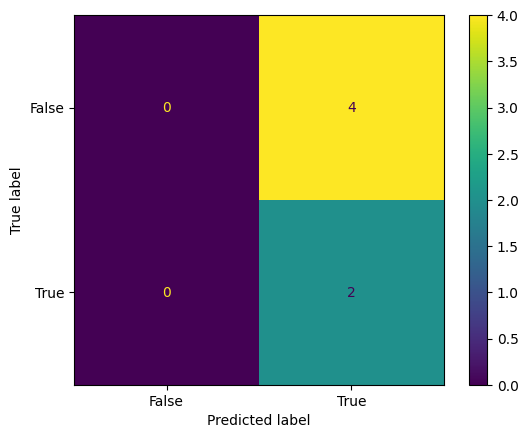

In [7]:
prednb = NB.predict(X_test)
precision = precision_score(y_test, prednb)
recall = recall_score(y_test, prednb)
 
print('Accuracy: ',accuracy_score(y_test,prednb))
print('Precision: ',precision)
print('Recall: ',recall)
print('F1 Score: ', f1_score(y_test, prednb))


cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, prednb), display_labels = [False, True]) 
cm_display.plot()
plt.show() 

Logistic Regression

c:\Users\jyoth\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy:  0.5
Precision:  0.4
Recall:  1.0
F1 Score:  0.5714285714285715


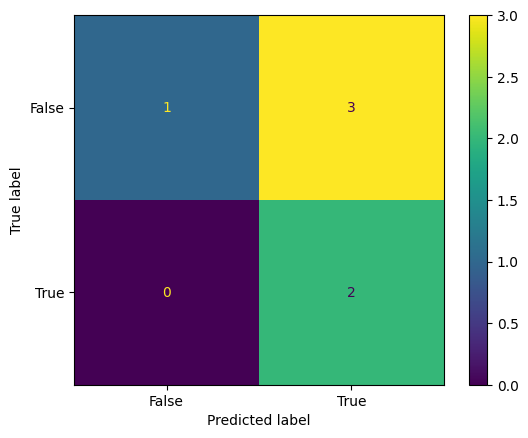

In [8]:
from sklearn.linear_model import LogisticRegression


LR = LogisticRegression()
LR.fit(X_train, y_train)
predlr=LR.predict(X_test)

precision = precision_score(y_test, predlr)
recall = recall_score(y_test, predlr)
 
print('Accuracy: ',accuracy_score(y_test,predlr)) 
print('Precision: ',precision)
print('Recall: ',recall)
print('F1 Score: ', f1_score(y_test, predlr))


cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, predlr), display_labels = [False, True]) 
cm_display.plot()
plt.show() 

Random Forest

Accuracy:  0.5
Precision:  0.4
Recall:  1.0
F1 Score:  0.5714285714285715


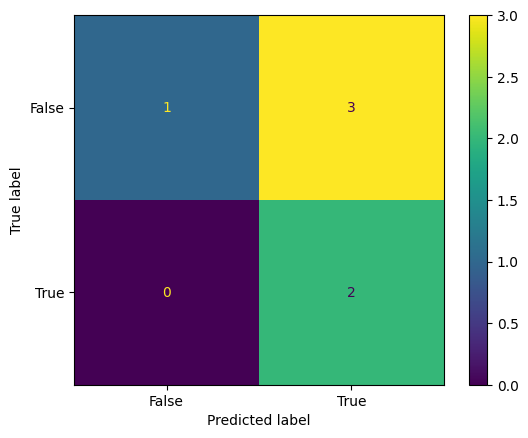

In [9]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)

# Train the model using the training data
rf.fit(X_train, y_train)
predrf = rf.predict(X_test)

precision = precision_score(y_test, predrf)
recall = recall_score(y_test, predrf)

print('Accuracy: ',accuracy_score(y_test,predrf))
print('Precision: ',precision)
print('Recall: ',recall)
print('F1 Score: ', f1_score(y_test, predrf))

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, predrf), display_labels = [False, True]) 
cm_display.plot()
plt.show() 


ANN


In [10]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train1 = sc.fit_transform(X_train)
X_test1 = sc.fit_transform(X_test)

In [11]:

tf.random.set_seed(3)

ann = tf.keras.models.Sequential([
  tf.keras.layers.Dense(1)
])

try: # check if feature file already exists
        # load features
    feat_file = os.path.join(os.getcwd(), 'Femalemodelx')
    ann.load_weights('Femalemodelx')

except: # SGD is short for stochastic gradient descent
  ann.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(),  metrics=["mae"])
  ann.fit(X_train1,y_train,batch_size=128,epochs = 100)


In [12]:
res=(ann.predict(X_test1))
y_res=[]
ct=0
cf=0
for i in res:
    if i>0.5:
        y_res.append(1)
    else:
        y_res.append(0)


1/1 [==============================] - 0s 289ms/step


Accuracy:  0.8333333333333334
Precision:  0.6666666666666666
Recall:  1.0
F1 Score:  0.8


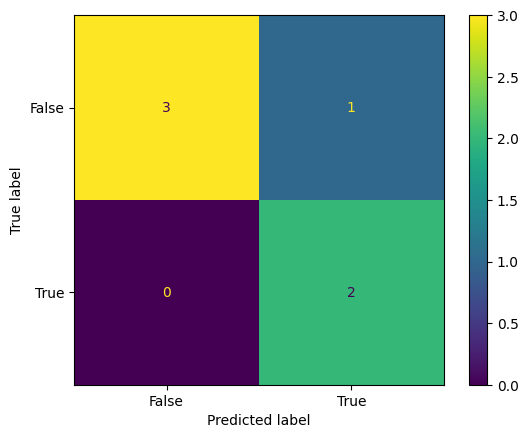

In [31]:
precision = precision_score(y_test, y_res)
recall = recall_score(y_test, y_res)

print('Accuracy: ',accuracy_score(y_test,y_res))
print('Precision: ',precision)
print('Recall: ',recall)
print('F1 Score: ', f1_score(y_test, y_res))

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_res), display_labels = [False, True]) 
cm_display.plot()
plt.show() 

Voting


In [15]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

estimator = []
estimator.append(('LR', LogisticRegression(solver ='lbfgs', max_iter = 200)))
estimator.append(('SVC', SVC(gamma ='auto', probability = True)))
estimator.append(('DTC', DecisionTreeClassifier()))
  
# Voting Classifier with hard voting
vot_hard = VotingClassifier(estimators = estimator, voting ='hard')
vot_hard.fit(X_train, y_train)
y_predhard = vot_hard.predict(X_test)
  
# using accuracy_score metric to predict accuracy
score = accuracy_score(y_test, y_predhard)
print("Hard Voting Score % d" % score)
  
# Voting Classifier with soft voting
vot_soft = VotingClassifier(estimators = estimator, voting ='soft')
vot_soft.fit(X_train, y_train)
y_predsoft = vot_soft.predict(X_test)
  
# using accuracy_score
score = accuracy_score(y_test, y_predsoft)
print("Soft Voting Score % d" % score)

Hard Voting Score  0
Soft Voting Score  0


Accuracy:  0.5


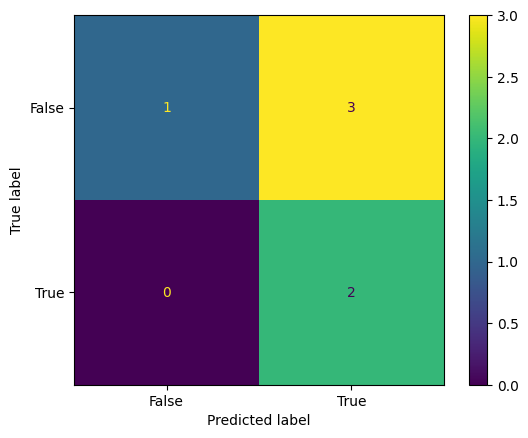

In [16]:
print('Accuracy: ',accuracy_score(y_test,y_predhard))
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_predhard), display_labels = [False, True]) 
cm_display.plot()
plt.show() 

Accuracy:  0.5


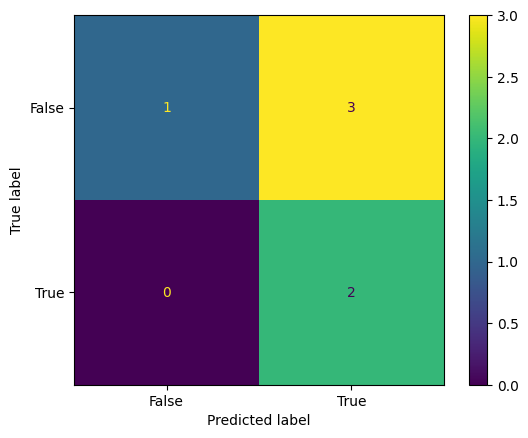

In [17]:
print('Accuracy: ',accuracy_score(y_test,y_predsoft))
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_predsoft), display_labels = [False, True]) 
cm_display.plot()
plt.show() 

Ensemble

In [18]:
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [19]:
seed = 8
kfold = model_selection.KFold(n_splits = 3)
 
# initialize the base classifier
base_cls = DecisionTreeClassifier()
 
# no. of base classifier
num_trees = 500
 
# bagging classifier
model = BaggingClassifier(base_estimator = base_cls,  n_estimators = num_trees,random_state = seed)
 
results = model_selection.cross_val_score(model, X_train, y_train, cv = kfold)
print("accuracy :")
print(results.mean())


c:\Users\jyoth\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\jyoth\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\jyoth\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


accuracy :
0.6


c:\Users\jyoth\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


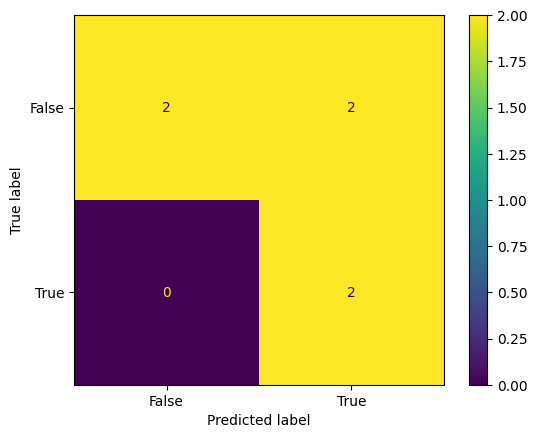

In [20]:


model.fit(X_train,y_train)
y_predbag=model.predict(X_test)
#print('Accuracy: ',accuracy_score(y_test,results))
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_predbag), display_labels = [False, True]) 
cm_display.plot()
plt.show() 

XGBoost

In [21]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

Accuracy:  0.5


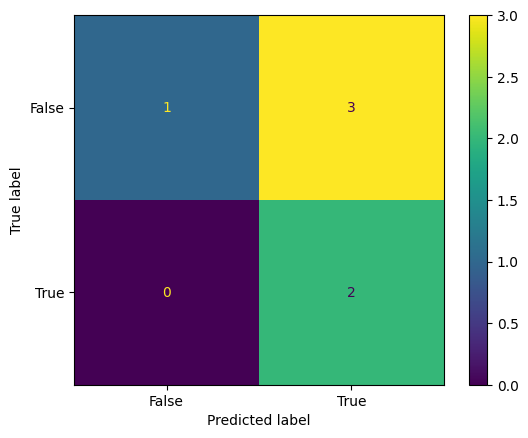

In [22]:

 
# Fitting XGBoost to the training data
my_model = xgb.XGBClassifier()
my_model.fit(X_train, y_train)
 
# Predicting the Test set results
y_pred = my_model.predict(X_test)
 
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

print('Accuracy: ',accuracy_score(y_test,y_pred))
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred), display_labels = [False, True]) 
cm_display.plot()
plt.show() 

In [23]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print('Precision: ',precision)
print('Recall: ',recall)
print('F1 Score: ', f1_score(y_test, y_pred))


Precision:  0.4
Recall:  1.0
F1 Score:  0.5714285714285715
